In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install --upgrade scikit-learn


In [3]:
df = pd.read_csv('medical_insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
df.shape

(2772, 7)

In [7]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [8]:

df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].map({'northeast': 0, 'southeast': 1, 'southwest': 2, 'northwest': 3})


In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [10]:
print(df['region'].unique())

[2 1 3 0]


In [11]:
duplicates = df[df.duplicated()]
print(f"Duplicate rows: {duplicates.shape[0]}")

Duplicate rows: 1435


In [12]:
df = df.drop_duplicates()
print(f"New shape after dropping duplicates: {df.shape}")

New shape after dropping duplicates: (1337, 7)


In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

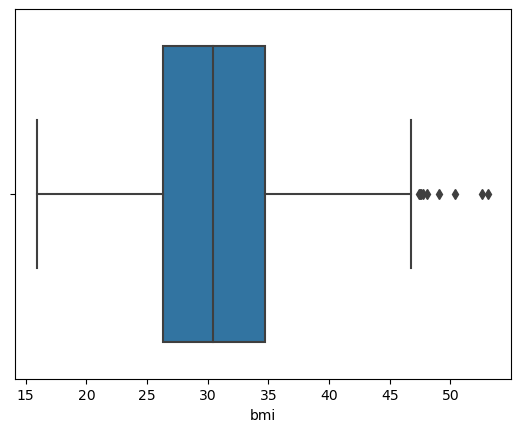

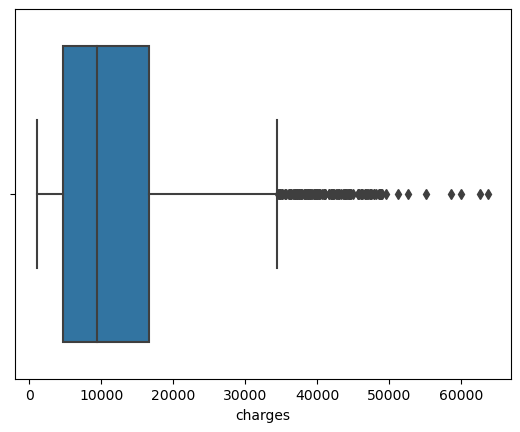

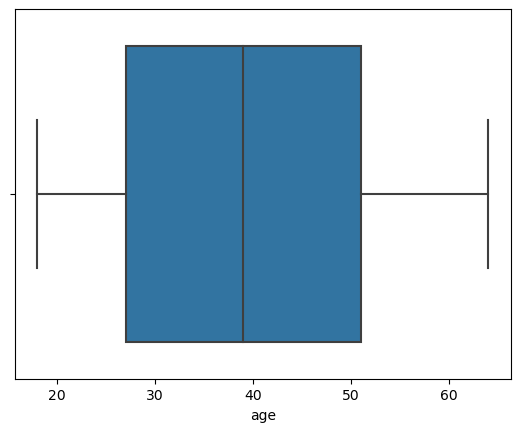

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['bmi', 'charges', 'age']:
    sns.boxplot(x=df[col])
    plt.show()

In [15]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Capping
    df[column] = df[column].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)
    return df
df_capped = df.copy()
df_capped = cap_outliers(df_capped, 'bmi')
print("Original shape:", df.shape)
print("After Capping:", df_capped.shape)

Original shape: (1337, 7)
After Capping: (1337, 7)


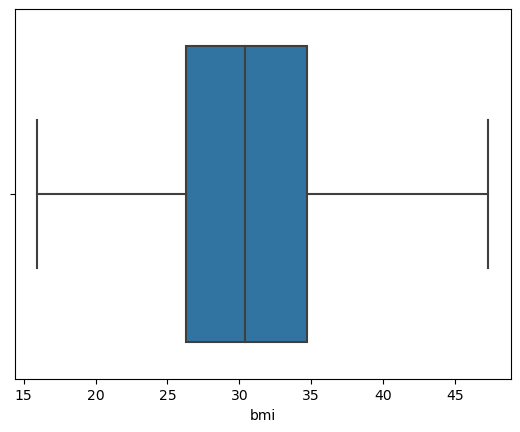

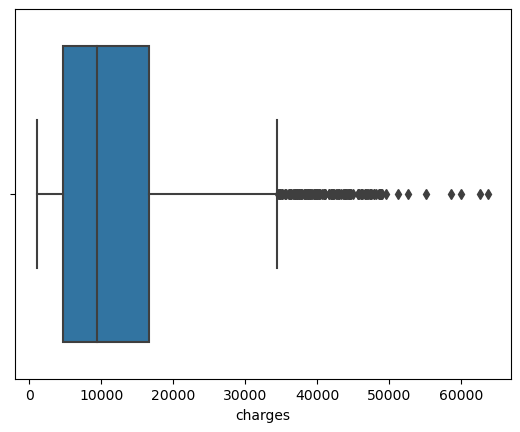

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['bmi', 'charges']:
    sns.boxplot(x=df_capped[col])
    plt.show()

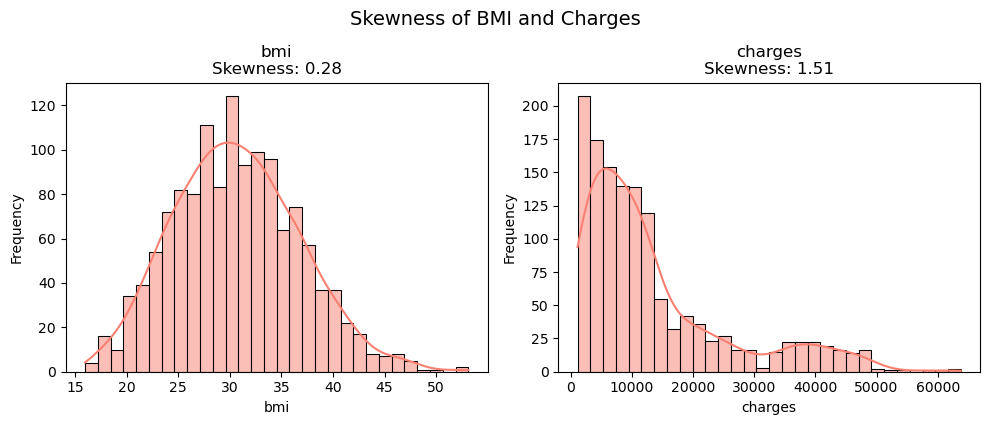

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

cols_to_plot = ['bmi', 'charges']

plt.figure(figsize=(10, 4))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='salmon')
    skewness = skew(df[col].dropna())
    plt.title(f"{col}\nSkewness: {round(skewness, 2)}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Skewness of BMI and Charges", fontsize=14, y=1.05)
plt.show()

In [19]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.485415,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.104552,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# EDA

1. What is the distribution of medical insurance charges?
 

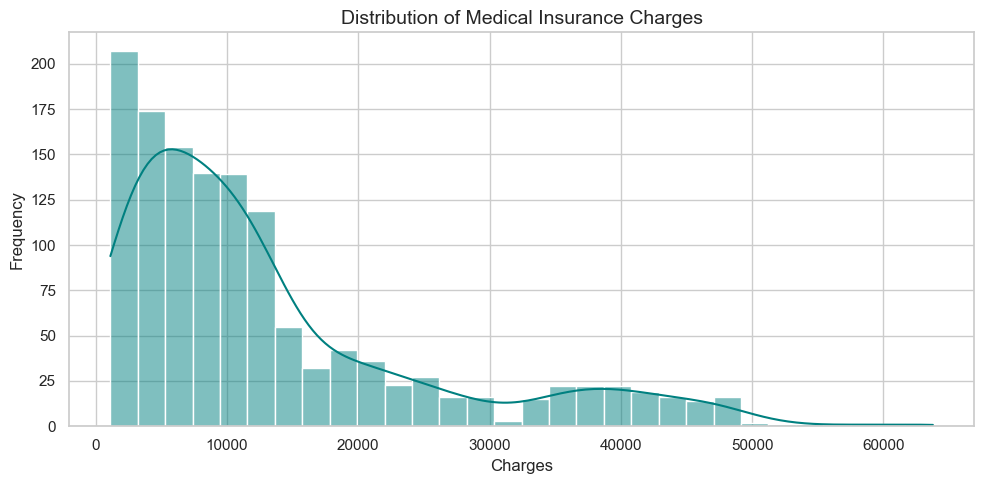

In [20]:
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df['charges'], kde=True, bins=30, color='teal')
plt.title('Distribution of Medical Insurance Charges', fontsize=14)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

2.What is the age distribution of the individuals?

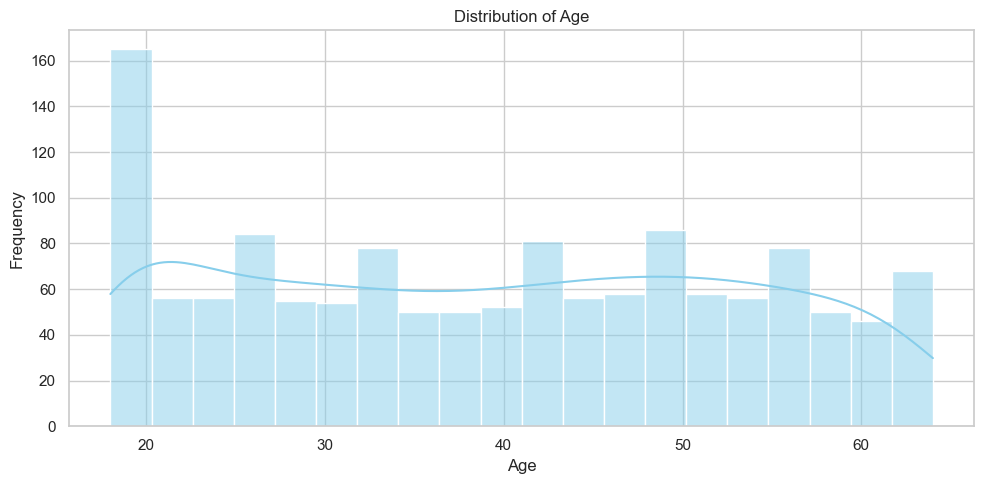

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

3.How many people are smokers vs non-smokers?


0    1063
1     274
Name: smoker, dtype: int64

Percentage:
0    79.506358
1    20.493642
Name: smoker, dtype: float64


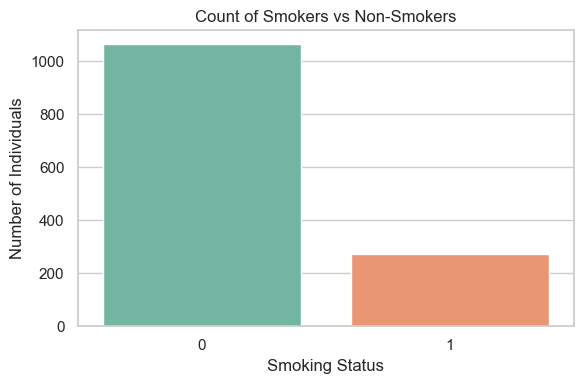

In [22]:
smoker_counts = df['smoker'].value_counts()
print(smoker_counts)

# Percentage
print("\nPercentage:")
print(df['smoker'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='smoker', data=df, palette='Set2')
plt.title('Count of Smokers vs Non-Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Individuals')
plt.tight_layout()
plt.show()

4. What is the average BMI in the dataset?

Average BMI: 30.66

BMI Summary Statistics:
count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64


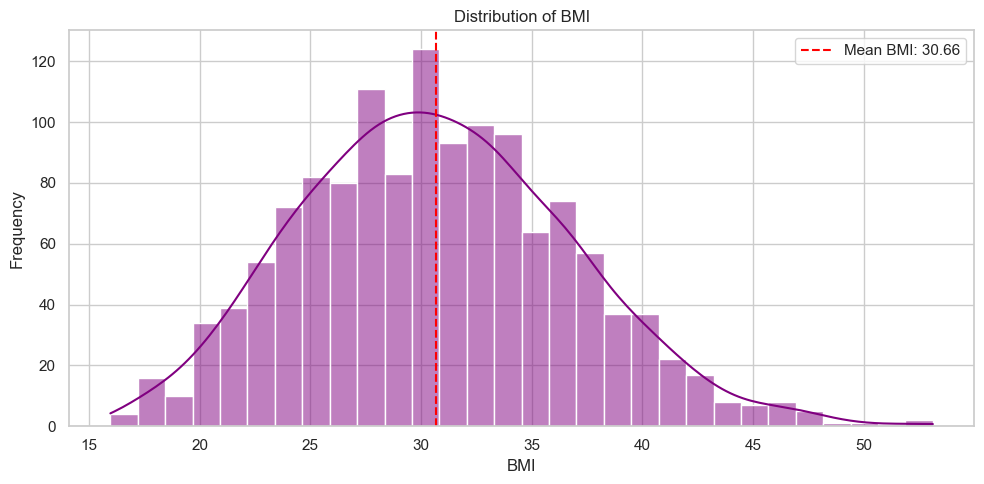

In [23]:
average_bmi = df['bmi'].mean()
print(f"Average BMI: {average_bmi:.2f}")

# statistics
print("\nBMI Summary Statistics:")
print(df['bmi'].describe())

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df['bmi'], kde=True, bins=30, color='purple')
plt.axvline(average_bmi, color='red', linestyle='--', label=f'Mean BMI: {average_bmi:.2f}')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

5. Which regions have the most number of policyholders?

Policyholders per region:
 1    364
2    325
3    324
0    324
Name: region, dtype: int64

Percentage distribution:
1    27.225131
2    24.308153
3    24.233358
0    24.233358
Name: region, dtype: float64


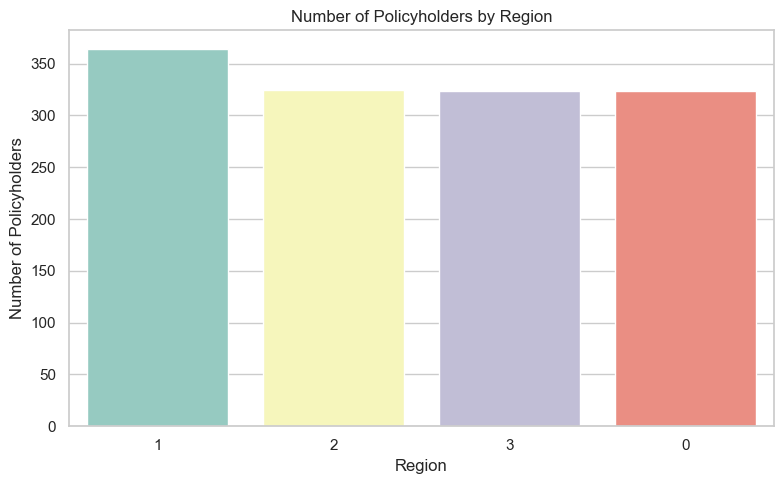

In [24]:
region_counts = df['region'].value_counts()
print("Policyholders per region:\n", region_counts)

# Percentage
print("\nPercentage distribution:")
print(df['region'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
sns.countplot(x='region', data=df, palette='Set3', order=region_counts.index)
plt.title('Number of Policyholders by Region')
plt.xlabel('Region')
plt.ylabel('Number of Policyholders')
plt.tight_layout()
plt.show()

6. How do charges vary with age?

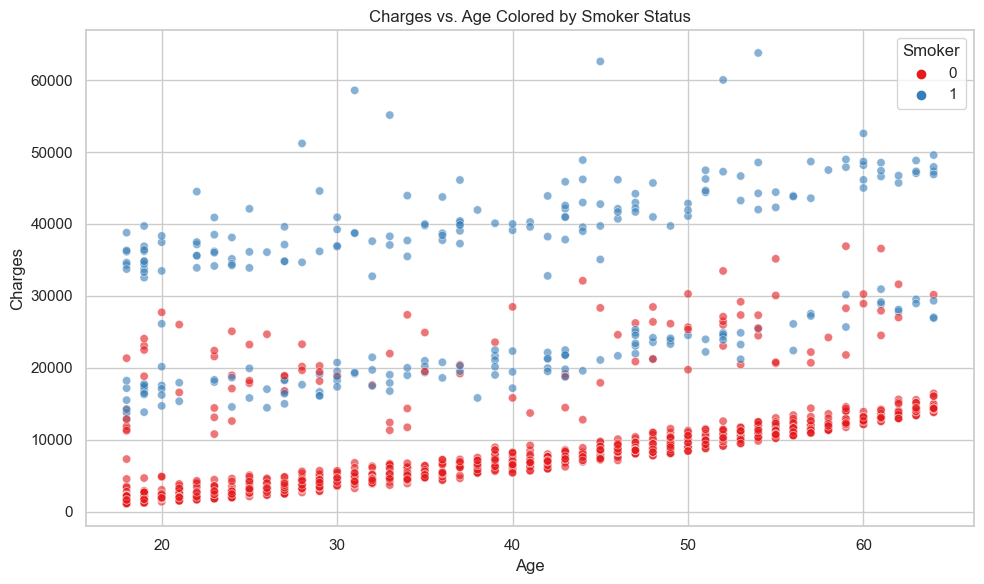

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, alpha=0.6, palette='Set1')
plt.title('Charges vs. Age Colored by Smoker Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.tight_layout()
plt.show()

7. Is there a difference in average charges between smokers and non-smokers?


Average Charges:
 smoker
0     8440.660307
1    32050.231832
Name: charges, dtype: float64

Number of Smokers and Non-Smokers:
0    1063
1     274
Name: smoker, dtype: int64


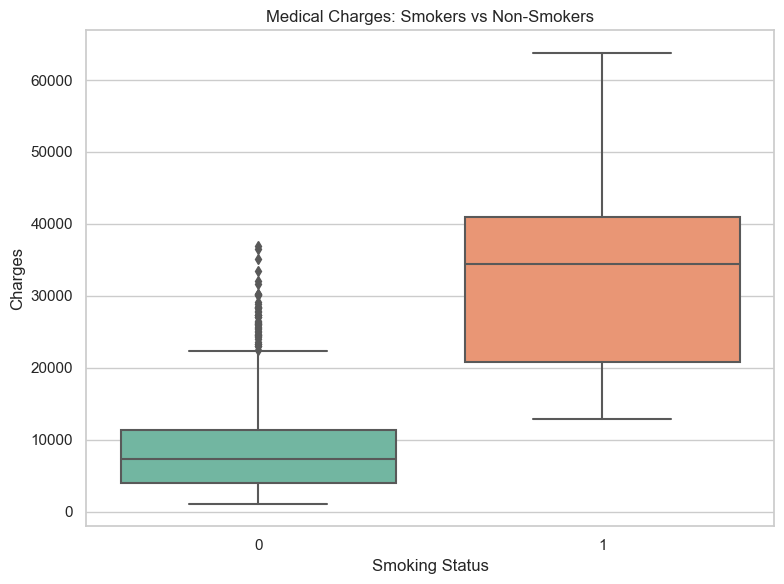

In [26]:
# Group-wise mean charges
mean_charges = df.groupby('smoker')['charges'].mean()
print("Average Charges:\n", mean_charges)

# Count
print("\nNumber of Smokers and Non-Smokers:")
print(df['smoker'].value_counts())

plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title('Medical Charges: Smokers vs Non-Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

8. Does BMI impact insurance charges?


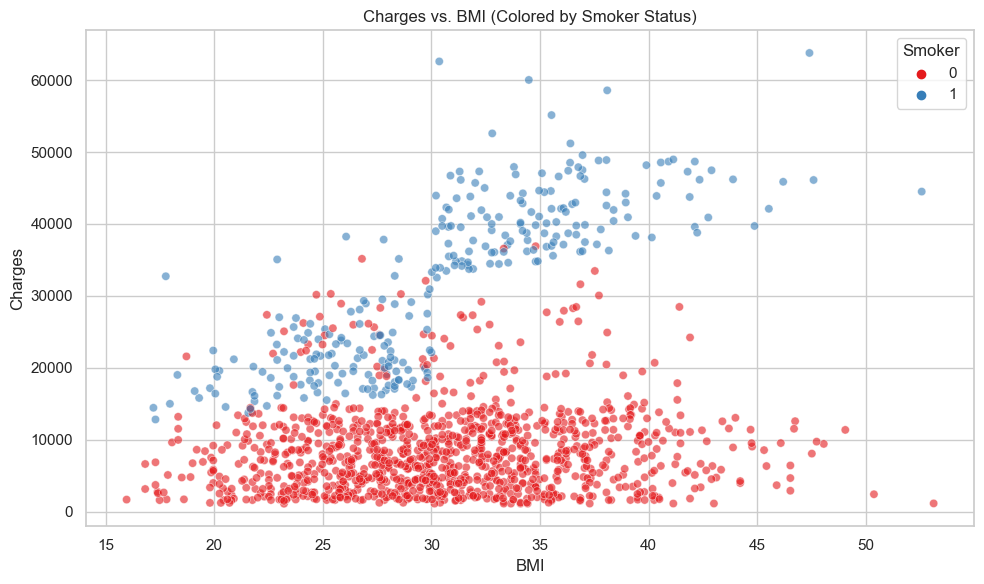

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.6, palette='Set1')
plt.title('Charges vs. BMI (Colored by Smoker Status)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.tight_layout()
plt.show()

9. Do men or women pay more on average?


Average Charges by Gender:
 sex
0    12569.578844
1    13974.998864
Name: charges, dtype: float64

Number of Male vs Female:
1    675
0    662
Name: sex, dtype: int64


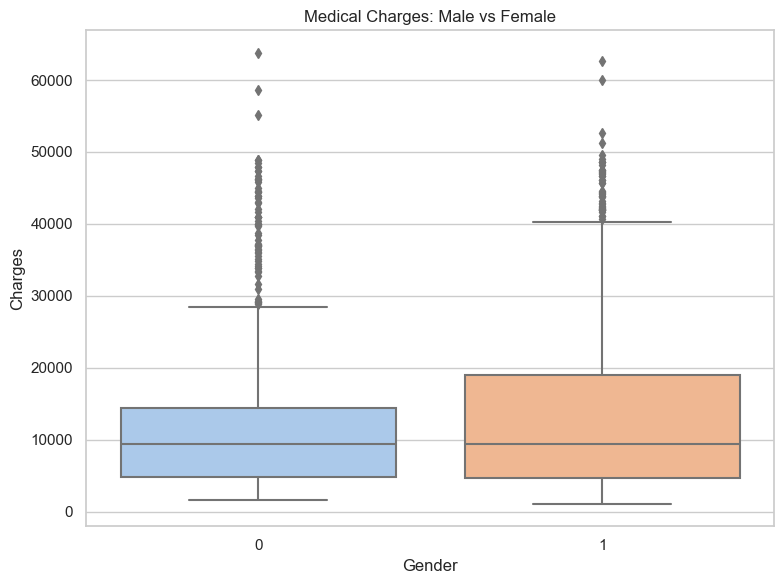

In [28]:
# Group by gender and calculate mean charges
mean_charges_gender = df.groupby('sex')['charges'].mean()
print("Average Charges by Gender:\n", mean_charges_gender)

# Count
print("\nNumber of Male vs Female:")
print(df['sex'].value_counts())

plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df, palette='pastel')
plt.title('Medical Charges: Male vs Female')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

10. Is there a correlation between the number of children and the insurance charges?

Average Charges by Number of Children:
 children
0    12384.695344
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

Number of policyholders per children count:
0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


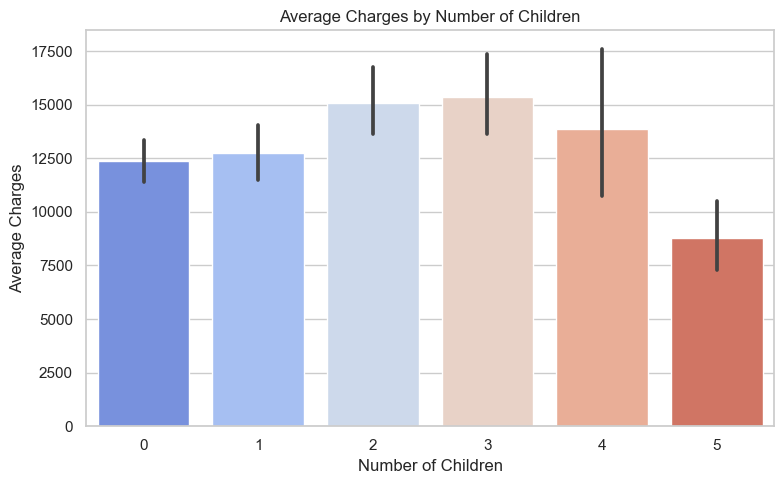

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [29]:
# Group by number of children
avg_charges_children = df.groupby('children')['charges'].mean()
print("Average Charges by Number of Children:\n", avg_charges_children)

# Optional: Count
print("\nNumber of policyholders per children count:")
print(df['children'].value_counts())

# Bar Plot: Avg Charges vs Children

plt.figure(figsize=(8, 5))
sns.barplot(x='children', y='charges', data=df, estimator='mean', palette='coolwarm')
plt.title('Average Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 5))


11.How does smoking status combined with age affect medical charges?

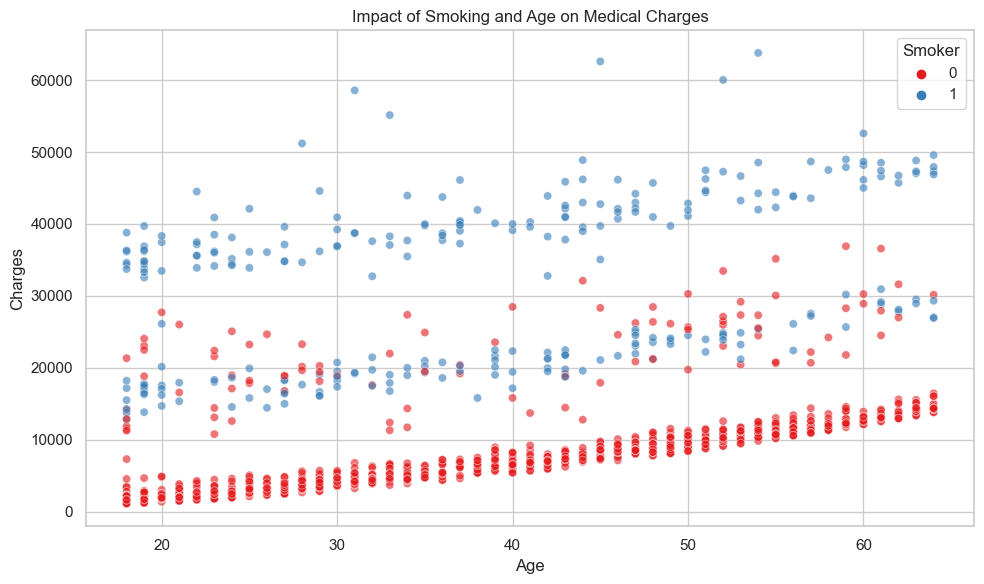

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='Set1', alpha=0.6)
plt.title('Impact of Smoking and Age on Medical Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.tight_layout()
plt.show()

12.What is the impact of gender and region on charges for smokers?


C:\Users\swath\AppData\Local\Temp\ipykernel_15340\1070388219.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smokers_df['sex_label'] = smokers_df['sex'].map(sex_map)
C:\Users\swath\AppData\Local\Temp\ipykernel_15340\1070388219.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smokers_df['region_label'] = smokers_df['region'].map(region_map)


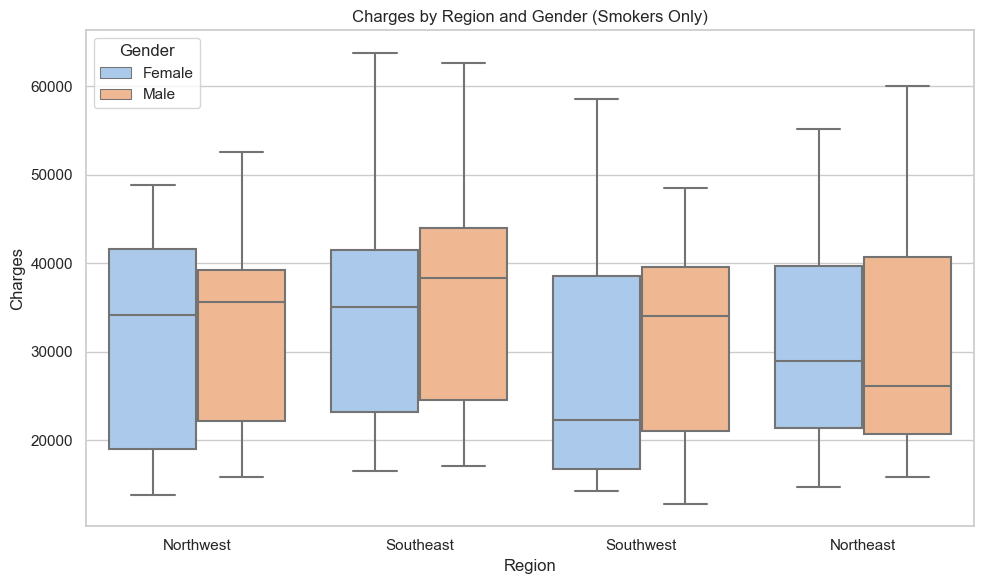

In [31]:
# Filter smokers (assuming 1 = smoker)
smokers_df = df[df['smoker'] == 1]

# Map numeric codes to readable labels
sex_map = {0: 'Female', 1: 'Male'}
region_map = {0: 'Southwest', 1: 'Southeast', 2: 'Northwest', 3: 'Northeast'}

smokers_df['sex_label'] = smokers_df['sex'].map(sex_map)
smokers_df['region_label'] = smokers_df['region'].map(region_map)

plt.figure(figsize=(10, 6))
sns.boxplot(data=smokers_df, x='region_label', y='charges', hue='sex_label', palette='pastel')
plt.title('Charges by Region and Gender (Smokers Only)')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

13.How do age, BMI, and smoking status together affect insurance cost?

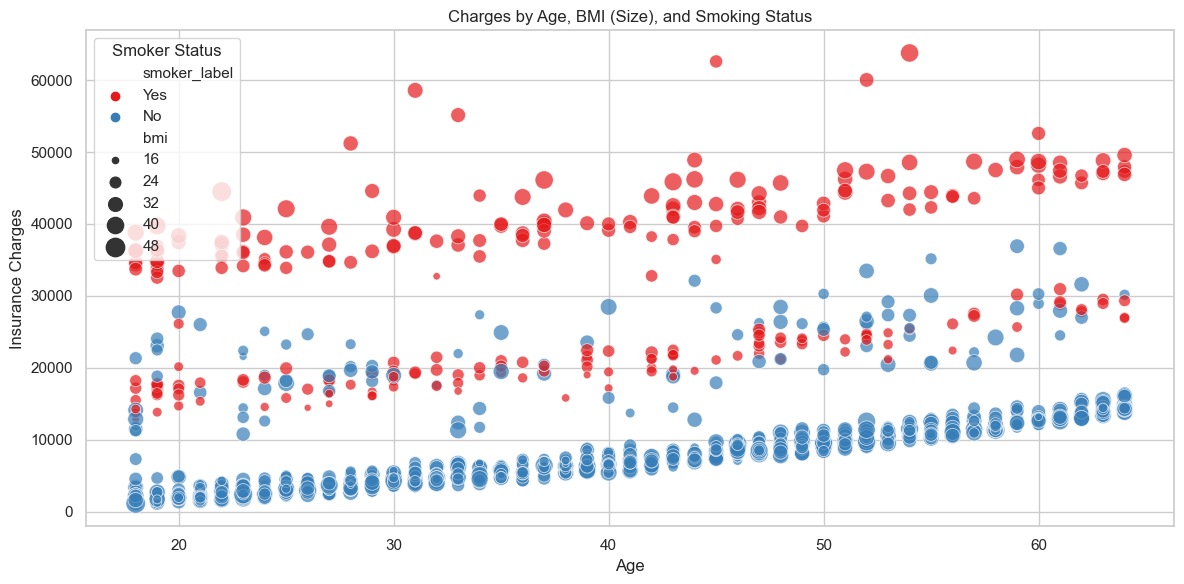

In [32]:
smoker_map = {0: 'No', 1: 'Yes'}
df['smoker_label'] = df['smoker'].map(smoker_map)

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df,
                x='age', y='charges',
                hue='smoker_label',
                size='bmi',
                sizes=(20, 200),
                alpha=0.7,
                palette='Set1')

plt.title('Charges by Age, BMI (Size), and Smoking Status')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.legend(title='Smoker Status')
plt.tight_layout()
plt.show()

14.Do obese smokers (BMI > 30) pay significantly higher than non-obese non-smokers?

C:\Users\swath\AppData\Local\Temp\ipykernel_15340\3271314111.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['group'] = 'Obese Smokers'
C:\Users\swath\AppData\Local\Temp\ipykernel_15340\3271314111.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2['group'] = 'Non-Obese Non-Smokers'


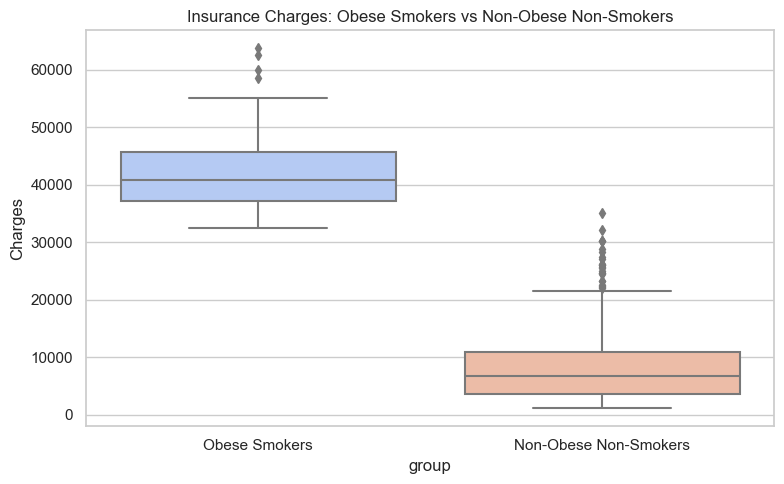

Average charges:
group
Non-Obese Non-Smokers     7966.944150
Obese Smokers            41692.808992
Name: charges, dtype: float64


In [33]:
# Define the two groups
group1 = df[(df['smoker'] == 1) & (df['bmi'] > 30)]  # Obese smokers
group2 = df[(df['smoker'] == 0) & (df['bmi'] <= 30)]  # Non-obese non-smokers

# Combine for plotting
group1['group'] = 'Obese Smokers'
group2['group'] = 'Non-Obese Non-Smokers'
combined_df = pd.concat([group1, group2])

# Boxplot to compare charges
plt.figure(figsize=(8, 5))
sns.boxplot(data=combined_df, x='group', y='charges', palette='coolwarm')
plt.title('Insurance Charges: Obese Smokers vs Non-Obese Non-Smokers')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

# Print mean charges
print("Average charges:")
print(combined_df.groupby('group')['charges'].mean())


15.Are there outliers in the charges column? Who are the individuals paying the highest costs?


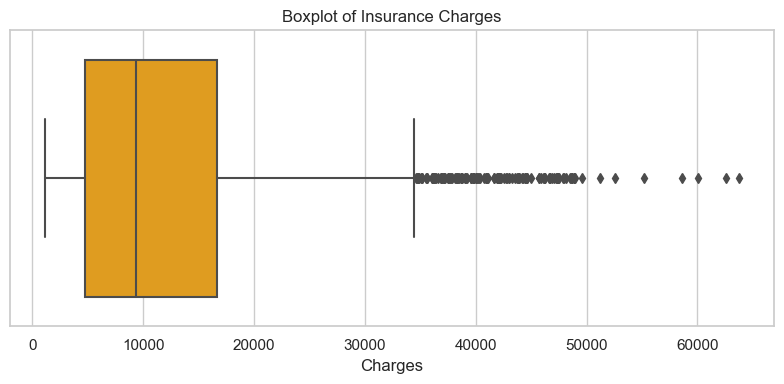

Top 5 individuals with highest charges:
      age  sex     bmi  children  smoker  region      charges
543    54    0  47.410         0       1       1  63770.42801
1300   45    1  30.360         0       1       1  62592.87309
1230   52    1  34.485         3       1       3  60021.39897
577    31    0  38.095         1       1       0  58571.07448
819    33    0  35.530         0       1       3  55135.40209


In [34]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='charges', color='orange')
plt.title('Boxplot of Insurance Charges')
plt.xlabel('Charges')
plt.tight_layout()
plt.show()

top_payers = df.sort_values(by='charges', ascending=False).head(5)
print("Top 5 individuals with highest charges:")
print(top_payers[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']])

16.Are there extreme BMI values that could skew predictions?


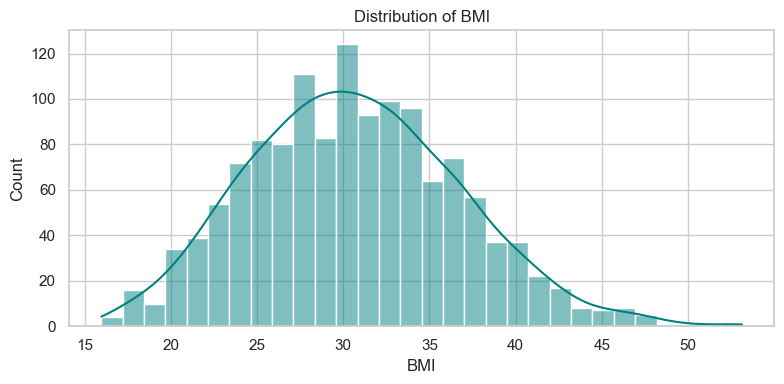

In [35]:
plt.figure(figsize=(8, 4))
sns.histplot(df['bmi'], bins=30, kde=True, color='teal')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.tight_layout()
plt.show()

17. What is the correlation between numeric features like age, BMI, number of children, and charges?


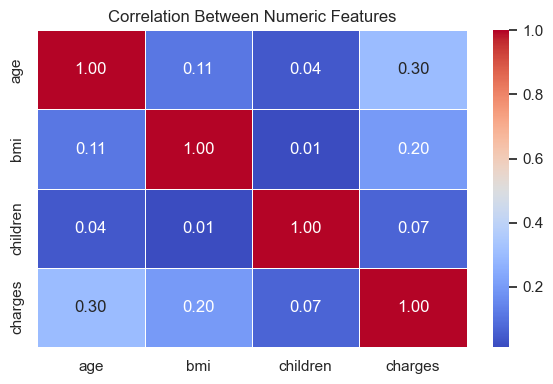

In [36]:
# Select numeric columns only (adjust if columns were renamed/encoded)
numeric_cols = ['age', 'bmi', 'children', 'charges']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Numeric Features')
plt.tight_layout()
plt.show()

18.Which features have the strongest correlation with the target variable (charges)?


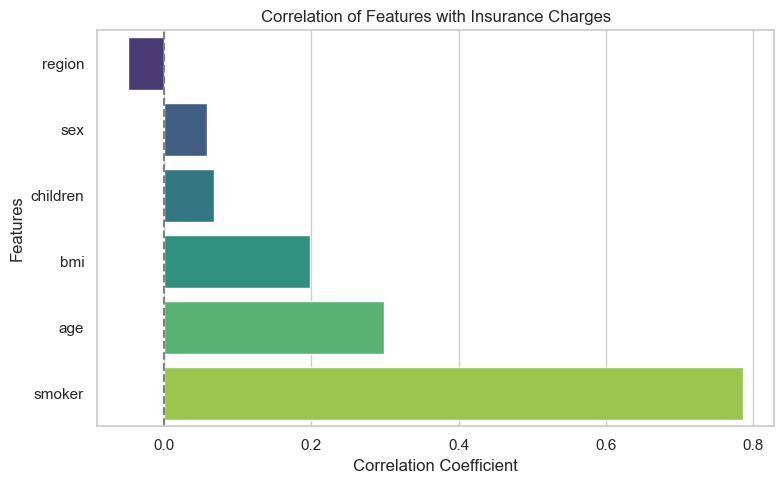

In [37]:
# Compute correlation with charges (excluding charges itself)
correlations = df.corr(numeric_only=True)['charges'].drop('charges').sort_values(key=abs, ascending=True)

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Correlation of Features with Insurance Charges')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[['age', 'bmi', 'children', 'sex', 'smoker', 'region']]
y = df['charges']

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


In [39]:
X

,age,bmi,children,sex,smoker,region
0,19,27.900,0,0,1,2
1,18,33.770,1,1,0,1
2,28,33.000,3,1,0,1
3,33,22.705,0,1,0,3
4,32,28.880,0,1,0,3
...,...,...,...,...,...,...
1333,50,30.970,3,1,0,3
1334,18,31.920,0,0,0,0
1335,18,36.850,0,0,0,1
1336,21,25.800,0,0,0,2


In [40]:
#SVR Training (separately tuned)
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Scale features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid Search for SVR
params = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 1, 5],
    'kernel': ['rbf', 'linear']
}

svr = SVR()
grid = GridSearchCV(svr, param_grid=params, cv=3, scoring='r2')
grid.fit(X_train_scaled, y_train)

best_svr = grid.best_estimator_


In [42]:
#Other Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import joblib
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVR': best_svr
}


In [44]:
#MLflow Setup
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

mlflow.set_experiment("Medical Insurance Cost Prediction")

results = []

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        if name == 'SVR':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            input_example = pd.DataFrame(X_test_scaled[:1], columns=X.columns)
            signature = infer_signature(X_test_scaled, y_pred[:1])
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            input_example = X_test.iloc[:1]
            signature = infer_signature(X_test, y_pred[:1])
            
        # Metrics
        rmse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Log metrics
        mlflow.log_param("Model", name)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)

        # Log model
        mlflow.sklearn.log_model(model, f"{name}_model",
                                 input_example=input_example,
                                 signature=signature)
        

        # Store results
        results.append({
            "Model": name,
            "RMSE": round(rmse, 2),
            "MAE": round(mae, 2),
            "R2 Score": round(r2, 4)
        })
        
    

# Show summary
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R2 Score', ascending=False))


C:\Users\swath\anaconda3\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


C:\Users\swath\anaconda3\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


C:\Users\swath\anaconda3\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


C:\Users\swath\anaconda3\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


               Model         RMSE      MAE  R2 Score
1      Random Forest  21103641.46  2537.83    0.8852
3            XGBoost  25875408.90  2950.35    0.8592
0  Linear Regression  35890416.92  4197.65    0.8047
2      Decision Tree  35998886.33  2675.07    0.8041
4                SVR  70570391.09  4200.68    0.6160


In [45]:
from mlflow.tracking import MlflowClient
import mlflow

client = MlflowClient()

# Use your saved Run ID and the model name you logged
run_id = "286e78cf745c48ce8e598578bf357372"
model_uri = f"runs:/{run_id}/Random Forest"  

# Register the model
model_name = "MedicalInsurancepredictorRF"
result = mlflow.register_model(model_uri=model_uri, name=model_name)

print("Model registered as version:", result.version)


Model registered as version: 1


Successfully registered model 'MedicalInsurancepredictorRF'.
Created version '1' of model 'MedicalInsurancepredictorRF'.


In [47]:
%%writefile MedicalInsuranceCostPrediction_app.py
import joblib
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model = joblib.load("model.pkl")

df = pd.read_csv("medical_insurance.csv")  # Load your dataset

# Navigation
st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Project Introduction", "Visualizations", "Cost Prediction"])

# Page 1: Project Introduction

if page == "Project Introduction":
    st.title("Medical Insurance Cost Prediction")
    st.markdown("""
    This project uses a dataset of medical insurance records to analyze key factors affecting insurance cost.

    **Goals:**
    - Explore patterns in charges based on age, BMI, smoking habits, region, etc.
    - Use Support Vector Regression (SVR) to predict insurance charges.
    """)

# Page 2: Visualizations

elif page == "Visualizations":
    st.title("Exploratory Data Analysis")

    def distribution_of_charges():
        plt.figure(figsize=(10, 5))
        sns.histplot(df['charges'], kde=True, bins=30, color='teal')
        plt.title('Distribution of Medical Insurance Charges')
        plt.xlabel('Charges')
        plt.ylabel('Frequency')
        plt.tight_layout()

    def age_distribution():
        plt.figure(figsize=(10, 5))
        sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
        plt.title('Distribution of Age')
        plt.xlabel('Age')
        plt.ylabel('Frequency')
        plt.tight_layout()

    def smoker_non_smoker():
        plt.figure(figsize=(6, 4))
        sns.countplot(x='smoker', data=df, palette='Set2')
        plt.title('Count of Smokers vs Non-Smokers')
        plt.xlabel('Smoking Status')
        plt.ylabel('Number of Individuals')
        plt.tight_layout()

    def avg_bmi():
        average_bmi = df['bmi'].mean()
        plt.figure(figsize=(10, 5))
        sns.histplot(df['bmi'], kde=True, bins=30, color='purple')
        plt.axvline(average_bmi, color='red', linestyle='--', label=f'Mean BMI: {average_bmi:.2f}')
        plt.title('Distribution of BMI')
        plt.xlabel('BMI')
        plt.ylabel('Frequency')
        plt.legend()
        plt.tight_layout()

    def no_of_policyholders():
        region_counts = df['region'].value_counts()
        plt.figure(figsize=(8, 5))
        sns.countplot(x='region', data=df, palette='Set3', order=region_counts.index)
        plt.title('Number of Policyholders by Region')
        plt.xlabel('Region')
        plt.ylabel('Number of Policyholders')
        plt.tight_layout()

    def charge_age():
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='age', y='charges', hue='smoker', data=df, alpha=0.6, palette='Set1')
        plt.title('Charges vs. Age Colored by Smoker Status')
        plt.xlabel('Age')
        plt.ylabel('Charges')
        plt.legend(title='Smoker')
        plt.tight_layout()

    def charges_smokervsnon():
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
        plt.title('Medical Charges: Smokers vs Non-Smokers')
        plt.xlabel('Smoking Status')
        plt.ylabel('Charges')
        plt.tight_layout()

    def bmi_charge():
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.6, palette='Set1')
        plt.title('Charges vs. BMI (Colored by Smoker Status)')
        plt.xlabel('BMI')
        plt.ylabel('Charges')
        plt.legend(title='Smoker')
        plt.tight_layout()

    def men_women_charge():
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='sex', y='charges', data=df, palette='pastel')
        plt.title('Medical Charges: Male vs Female')
        plt.xlabel('Gender')
        plt.ylabel('Charges')
        plt.tight_layout()

    def correlation_children_charge():
        plt.figure(figsize=(8, 5))
        sns.barplot(x='children', y='charges', data=df, estimator='mean', palette='coolwarm')
        plt.title('Average Charges by Number of Children')
        plt.xlabel('Number of Children')
        plt.ylabel('Average Charges')
        plt.tight_layout()

    def smoke_medicalcharge():
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='Set1', alpha=0.6)
        plt.title('Impact of Smoking and Age on Medical Charges')
        plt.xlabel('Age')
        plt.ylabel('Charges')
        plt.legend(title='Smoker')
        plt.tight_layout()

    def impact_gender():
        smokers_df = df[df['smoker'] == 1]
        smokers_df['sex_label'] = smokers_df['sex'].map({0: 'Female', 1: 'Male'})
        smokers_df['region_label'] = smokers_df['region'].map({0: 'northeast', 1: 'southeast', 2: 'southwest', 3: 'northwest'})
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=smokers_df, x='region_label', y='charges', hue='sex_label', palette='pastel')
        plt.title('Charges by Region and Gender (Smokers Only)')
        plt.xlabel('Region')
        plt.ylabel('Charges')
        plt.legend(title='Gender')
        plt.tight_layout()

    def age_BMI_smoking():
        df['smoker_label'] = df['smoker'].map({0: 'No', 1: 'Yes'})
        plt.figure(figsize=(12, 6))
        sns.scatterplot(data=df,
                        x='age', y='charges',
                        hue='smoker_label',
                        size='bmi',
                        sizes=(20, 200),
                        alpha=0.7,
                        palette='Set1')
        plt.title('Charges by Age, BMI (Size), and Smoking Status')
        plt.xlabel('Age')
        plt.ylabel('Insurance Charges')
        plt.legend(title='Smoker Status')
        plt.tight_layout()

    def obese_smokers():
        group1 = df[(df['smoker'] == 1) & (df['bmi'] > 30)]
        group2 = df[(df['smoker'] == 0) & (df['bmi'] <= 30)]
        group1['group'] = 'Obese Smokers'
        group2['group'] = 'Non-Obese Non-Smokers'
        combined_df = pd.concat([group1, group2])
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=combined_df, x='group', y='charges', palette='coolwarm')
        plt.title('Insurance Charges: Obese Smokers vs Non-Obese Non-Smokers')
        plt.ylabel('Charges')
        plt.tight_layout()

    def individuals_paying():
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x='charges', color='orange')
        plt.title('Boxplot of Insurance Charges')
        plt.xlabel('Charges')
        plt.tight_layout()

    def extreme_BMI():
        plt.figure(figsize=(8, 4))
        sns.histplot(df['bmi'], bins=30, kde=True, color='teal')
        plt.title('Distribution of BMI')
        plt.xlabel('BMI')
        plt.tight_layout()

    def numeric_features():
        numeric_cols = ['age', 'bmi', 'children', 'charges']
        corr_matrix = df[numeric_cols].corr()
        plt.figure(figsize=(6, 4))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title('Correlation Between Numeric Features')
        plt.tight_layout()

    def target_variable():
        correlations = df.corr(numeric_only=True)['charges'].drop('charges').sort_values(key=abs, ascending=True)
        plt.figure(figsize=(8, 5))
        sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
        plt.title('Correlation of Features with Insurance Charges')
        plt.xlabel('Correlation Coefficient')
        plt.ylabel('Features')
        plt.axvline(0, color='gray', linestyle='--')
        plt.tight_layout()

   
    questions = {
        "1. Distribution of Charges": distribution_of_charges,
        "2. Age Distribution": age_distribution,
        "3. Smokers vs Non-Smokers": smoker_non_smoker,
        "4. Average BMI": avg_bmi,
        "5. Policyholders by Region": no_of_policyholders,
        "6. Charges vs Age": charge_age,
        "7. Charges: Smokers vs Non-Smokers": charges_smokervsnon,
        "8. Charges vs BMI": bmi_charge,
        "9. Charges by Gender": men_women_charge,
        "10. Charges vs Number of Children": correlation_children_charge,
        "11. Charges by Age & Smoking": smoke_medicalcharge,
        "12. Charges by Region & Gender (Smokers)": impact_gender,
        "13. Combined Effect: Age, BMI, Smoking": age_BMI_smoking,
        "14. Obese Smokers vs Non-Obese Non-Smokers": obese_smokers,
        "15. Outliers in Charges": individuals_paying,
        "16. Outliers in BMI": extreme_BMI,
        "17. Correlation of Numeric Features": numeric_features,
        "18. Most Important Features for Charges": target_variable,
    }

    selected_question = st.selectbox("Select a question to visualize:", list(questions.keys()))
    questions[selected_question]() 
    fig = plt.gcf()
    st.pyplot(fig)


# Page 3: Prediction

elif page == "Cost Prediction":
    st.title(" Predict Insurance Charges (Random Forest Model)")
    st.subheader(" Enter the following details:")

    # User Inputs
    age = st.number_input("Age", min_value=18, max_value=100, value=30)
    bmi = st.number_input("BMI", min_value=10.0, max_value=60.0, value=25.0)
    children = st.number_input("Number of Children", min_value=0, max_value=10, value=1)
    smoker = st.selectbox("Smoker", ["Yes", "No"])
    region_input = st.selectbox("Region", ['northeast', 'southeast', 'southwest', 'northwest'])
    sex = st.selectbox("Sex", ["male", "female"])

    # Manual Encoding
    region_map = {'northeast': 0, 'southeast': 1, 'southwest': 2, 'northwest': 3}
    region_encoded = region_map[region_input]
    sex_encoded = 1 if sex == 'male' else 0
    smoker_encoded = 1 if smoker == 'Yes' else 0

    input_data = pd.DataFrame({
        'age': [age],
        'bmi': [bmi],
        'children': [children],
        'sex': [sex_encoded],
        'smoker': [smoker_encoded],
        'region': [region_encoded]
    })

    st.write(" Input Data Used for Prediction:")
    st.dataframe(input_data)

    if st.button("Predict"):
        prediction = model.predict(input_data)[0]
        st.success(f" Predicted Insurance Cost: {prediction:,.2f}")

   

Overwriting MedicalInsuranceCostPrediction_app.py


In [2]:
import os
os.getcwd()

'C:\\Users\\swath\\Guvi mini project 3'

In [43]:
import sklearn
print(sklearn.__version__)

1.7.0
